In [2]:
#In this challenge, 
# we ask you to complete the analysis of what sorts of people were likely to survive.
# In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.
import pandas as pd

In [3]:
train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")

In [4]:
train.shape

(891, 12)

In [5]:
test.shape

(418, 11)

In [6]:
print(train.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [12]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts() # 불린 추출
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind='bar', stacked=True, figsize=(10,5))

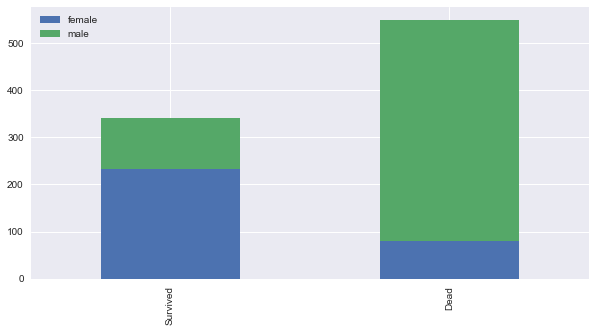

In [13]:
bar_chart('Sex')

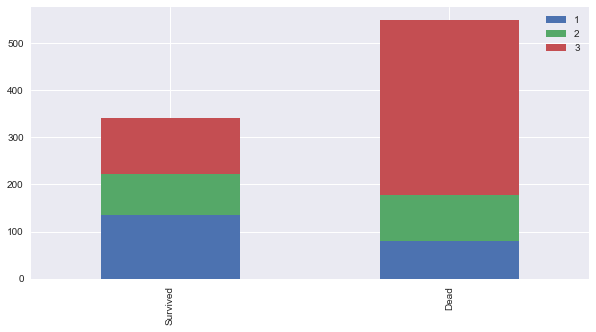

In [14]:
bar_chart('Pclass')

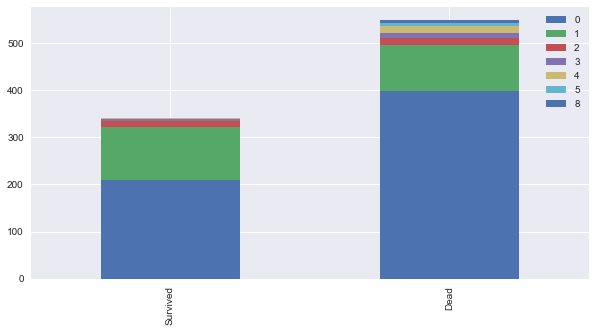

In [15]:
bar_chart('SibSp')

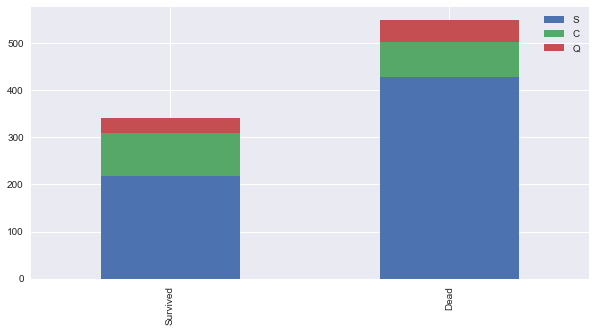

In [16]:
bar_chart('Embarked')

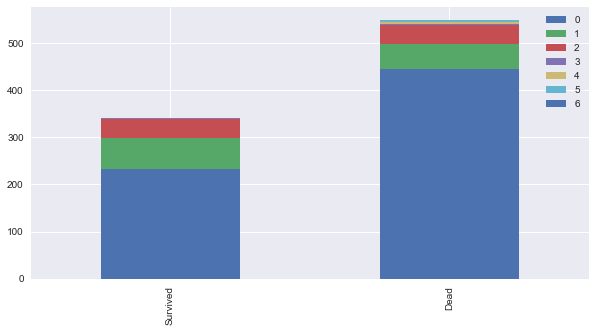

In [17]:
bar_chart('Parch')

In [20]:
df = pd.DataFrame(['Survived', 'Died'])

In [21]:
print(df)

          0
0  Survived
1      Died


In [24]:
survived = train[train['Survived']==1]

In [29]:
print(survived.head())

   PassengerId  Survived  Pclass  \
1            2         1       1   
2            3         1       3   
3            4         1       1   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch            Ticket     Fare Cabin Embarked  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
8      2            347742  11.1333   NaN        S  
9      0            237736  30.0708   NaN        C  


In [26]:
survived_sex = train[train['Survived']==1]['Sex']

In [28]:
print(survived_sex.head())

1    female
2    female
3    female
8    female
9    female
Name: Sex, dtype: object
